# MATH 210 Introduction to Mathematical Computing

## March 30, 2016

Today's Agenda:

1. Example: Vancouver Police Crime Data
2. Boolean indexing
3. Groupby
4. Exercises

In [1]:
import pandas as pd
import matplotlib
%matplotlib inline

## 1. Example: Vancouver Police Crime Data

The [Vancouver Police Crime Dataset](http://data.vancouver.ca/datacatalogue/crime-data.htm) is available from the City of Vancouver's [Open Data Catalogue](http://data.vancouver.ca/datacatalogue/index.htm). It contains the date, location (by neighborhood and GPS coordinates) and type of reported crimes from 2003 to the present and is updated every Sunday. We will only import data from 2015 and 2016 (since the entire dataset is over 50MB).

In [2]:
df = pd.read_csv('van_crime.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45802 entries, 0 to 45801
Data columns (total 7 columns):
TYPE             45802 non-null object
YEAR             45802 non-null int64
MONTH            45802 non-null int64
HUNDRED_BLOCK    45802 non-null object
NEIGHBOURHOOD    41815 non-null object
X                45802 non-null float64
Y                45802 non-null float64
dtypes: float64(2), int64(2), object(3)
memory usage: 2.8+ MB


In [4]:
df.head()

,TYPE,YEAR,MONTH,HUNDRED_BLOCK,NEIGHBOURHOOD,X,Y
0,Mischief,2015,3,26XX E 49TH AVE,Victoria-Fraserview,496065.581256,5452452.21332
1,Theft from Vehicle,2015,12,34XX WILLIAM ST,Hastings-Sunrise,497850.800800,5457932.70348
2,Theft from Vehicle,2015,4,34XX WILLIAM ST,Hastings-Sunrise,497879.450446,5457923.32039
3,Theft from Vehicle,2015,10,34XX WILLIAM ST,Hastings-Sunrise,497901.623450,5457932.27994
4,Theft from Vehicle,2015,9,34XX WILLIAM ST,Hastings-Sunrise,497921.510576,5457932.11421


We use the `.unique()` method to see the list of unique values in a given column.

In [5]:
df['TYPE'].unique()

array(['Mischief', 'Theft from Vehicle', 'Other Theft', 'Theft of Vehicle',
       'Break and Enter Residential/Other', 'Offence Against a Person',
       'Homicide', 'Break and Enter Commercial'], dtype=object)

In [6]:
df['NEIGHBOURHOOD'].unique()

array(['Victoria-Fraserview', 'Hastings-Sunrise', 'Renfrew-Collingwood',
       'Central Business District', 'Kensington-Cedar Cottage',
       'Mount Pleasant', 'Fairview', 'Dunbar-Southlands', 'Kitsilano',
       'Strathcona', 'South Cambie', 'Riley Park', 'Sunset', 'Killarney',
       'West End', 'Grandview-Woodland', nan, 'Arbutus Ridge', 'Musqueam',
       'Marpole', 'Kerrisdale', 'West Point Grey', 'Stanley Park',
       'Oakridge', 'Shaughnessy'], dtype=object)

## 2. Boolean indexing

We can access the rows in a DataFrame which contain certain values in certain columns. The syntax is

`df[df[col_name] == value]`

where `df` is the DataFrame and `col_name` is the column name. We can use any of the comparison operators <, >, !=, etc.

For example, let's see the list of homicides. The location of these crimes are excluded to protect privacy.

In [7]:
df[df['TYPE'] == 'Homicide']

,TYPE,YEAR,MONTH,HUNDRED_BLOCK,NEIGHBOURHOOD,X,Y
3485,Homicide,2015,3,OFFSET TO PROTECT PRIVACY,NaN,0,0
3486,Homicide,2015,9,OFFSET TO PROTECT PRIVACY,NaN,0,0
3488,Homicide,2015,7,OFFSET TO PROTECT PRIVACY,NaN,0,0
3489,Homicide,2015,7,OFFSET TO PROTECT PRIVACY,NaN,0,0
3491,Homicide,2015,4,OFFSET TO PROTECT PRIVACY,NaN,0,0
3493,Homicide,2015,1,OFFSET TO PROTECT PRIVACY,NaN,0,0
3495,Homicide,2015,9,OFFSET TO PROTECT PRIVACY,NaN,0,0
3496,Homicide,2015,11,OFFSET TO PROTECT PRIVACY,NaN,0,0
3497,Homicide,2015,8,OFFSET TO PROTECT PRIVACY,NaN,0,0
3498,Homicide,2015,8,OFFSET TO PROTECT PRIVACY,NaN,0,0


Let's select all the rows corresonding to Mischief in January 2016. To select multiple conditions, we have to separate each condition by parentheses and use the operator &.

In [8]:
df[(df['TYPE'] == 'Mischief') & (df['MONTH'] == 1) & (df['YEAR'] == 2016)].head()

,TYPE,YEAR,MONTH,HUNDRED_BLOCK,NEIGHBOURHOOD,X,Y
37510,Mischief,2016,1,25XX WALL ST,Hastings-Sunrise,496078.757654,5459839.78883
37512,Mischief,2016,1,25XX W 19TH AVE,Arbutus Ridge,488200.765793,5455869.92426
37515,Mischief,2016,1,25XX ST GEORGE ST,Mount Pleasant,493238.054474,5456636.58883
37521,Mischief,2016,1,25XX E 6TH AVE,Hastings-Sunrise,496188.094570,5456895.45482
37522,Mischief,2016,1,25XX E 21ST AVE,Renfrew-Collingwood,496042.142005,5455415.56179


## 2. Groupby

The `groupby` method will group together all the rows by their value in a specified column for aggregated computations. See the [documentation](http://pandas.pydata.org/pandas-docs/stable/groupby.html). A `groupby` object can be visualized as a collection of seperate DataFrames as in "split" part of the diagram:

![gruop](http://i.stack.imgur.com/sgCn1.jpg)

After applying `groupby` to a DataFrame, we apply a function to the result such as `.sum()` or `.mean()` which is applied down the columns of each DataFrame in the groupby object. We will be using `.size()` below to count the number of rows in each DataFrame in the `groupby` object.

**Example.** Plot number of reports by TYPE.

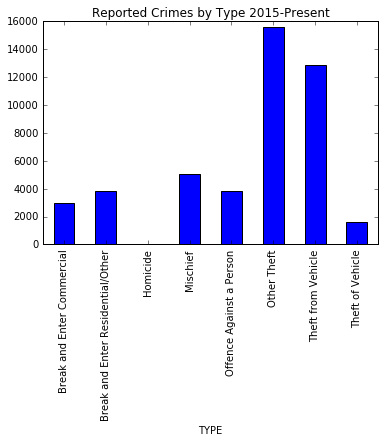

In [10]:
df.groupby('TYPE').size().plot(kind='bar',title='Reported Crimes by Type 2015-Present')

**Example.** Plot the number of reports of Theft from Vehicle by NEIGHBOURHOOD.

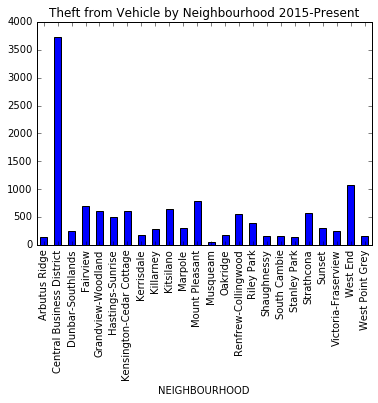

In [11]:
df[df['TYPE'] == 'Theft from Vehicle'].groupby('NEIGHBOURHOOD').size().plot(kind='bar',title='Theft from Vehicle by Neighbourhood 2015-Present')

**Example.** Plot the X and Y coordinates of all the Theft from Vehicle reports from Central Business District (as a scatter plot).

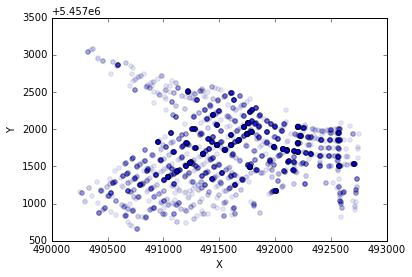

In [12]:
downtown = df[(df['TYPE'] == 'Theft from Vehicle') & (df['NEIGHBOURHOOD'] == 'Central Business District')]
downtown.plot(kind='scatter',x='X',y='Y',alpha=0.1)

**Example.** Plot the number of reports in the West End by TYPE.

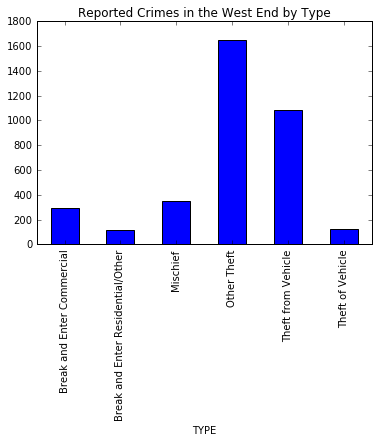

In [15]:
df[df['NEIGHBOURHOOD'] == 'West End'].groupby('TYPE').size().plot(kind='bar',title='Reported Crimes in the West End by Type')

**Example.** Plot the total number of reports by NEIGHBOURHOOD.

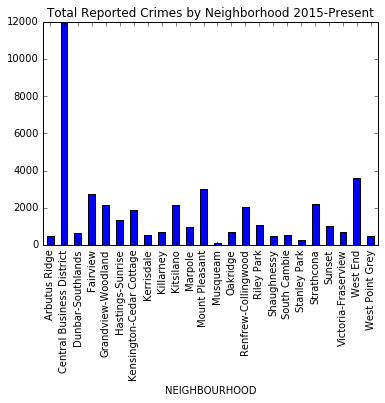

In [16]:
df.groupby('NEIGHBOURHOOD').size().plot(kind='bar',title='Total Reported Crimes by Neighborhood 2015-Present')

**Example.** Plot the coordinates of every report in the dataset. (Exclude the reports where X=0 and Y=0 corresponding to crimes where the location is excluded to protect privacy.)

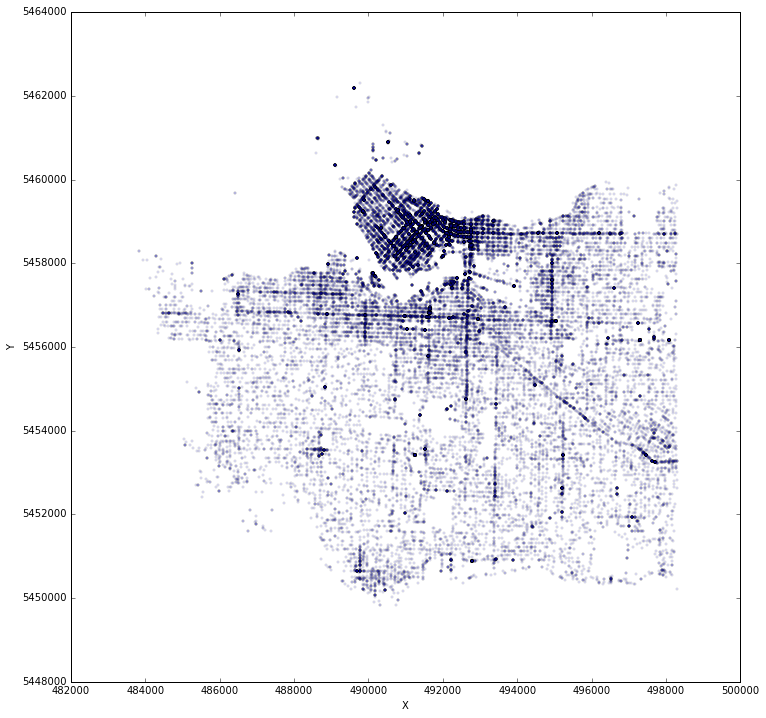

In [17]:
df[df['X'] != 0].plot(kind='scatter',x='X',y='Y',alpha=0.1,figsize=(12,12),s=5)
# alpha sets the transparency of the dots
# s sets the size of the dots

## 4. Exercises

**Exercise.** Create a scatter plot of the locations of every reported Theft of Vehicle.

**Exercise.** Create a bar plot of the number of reported crimes in West Point Grey in 2015 by month.

**Exercise.** Create a bar plot of the number of reported Theft from Vehicle crimes in 2015 by month.

**Exercise.** There is a reported crime in the dataset with approximate coordinates X=486000 and Y=5460000. (See the last plot in Section 3 above.) What is it?